# Predicting Heart Disease using machine learning

In this notebook i tried to build a ml model capable of predicting whether or not a person has heart disease or not based on their medical attributes 

Steps to follow 
1. Problem definition 
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimentation 

### Preparing the tools 
We're going to use Matplotlib,Numpy and Pandas

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)

%matplotlib inline 

#Models from Sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model evaluation

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve

#### Load Data

In [37]:
df = pd.read_csv("data\heart-disease.csv")
df.shape #rows and column

(303, 14)

#### Data exploration / EDA
Understanding the data by exploration and observation

1. What problems we're trying to solve
2. What differernt types of data we have and how to treat them each 
3. Missing data and how we'll deal with it
4. What are the outliers and why we should we care about them 
5. How can we add,change or remove features to get more out of the data

In [38]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [39]:
 df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

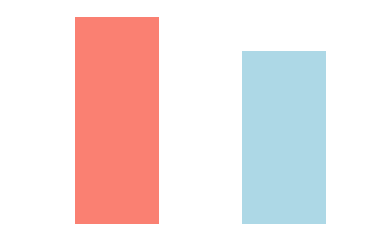

In [40]:
df["target"].value_counts().plot(kind= "bar", color=["salmon","lightblue"])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [42]:
 df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [43]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Trying to find/see coration between attributes**

In [44]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [45]:
# compare target with sex col 
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


We see almost 50% woman has heart disease

(array([0, 1]), <a list of 2 Text xticklabel objects>)

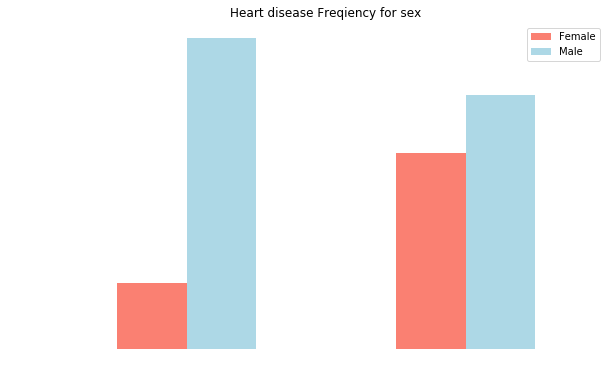

In [46]:
#making it more visual 
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon","lightblue"])
plt.title("Heart disease Freqiency for sex")
plt.xlabel("0= No Disease, 1= Disease")
plt.ylabel("Number")
plt.legend(["Female","Male"])
plt.xticks(rotation=0) #for bottom 0,1 rotaion

**Age vs max heart rate for HeartDisease**

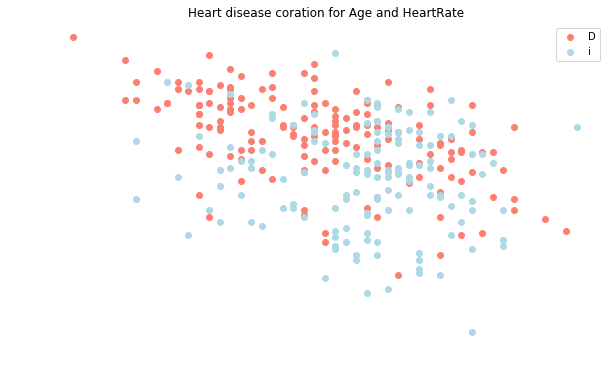

In [47]:
#Create a plot with 2 plots to compare 3 variables 
plt.figure(figsize=(10,6))

#Scatter plot with pos examples 

plt.scatter(df.age[df.target==1], # Shows the positive cases based on age
           df.thalach[df.target==1],
           color="salmon")
plt.title("Heart disease coration for Age and HeartRate")
plt.xlabel("Age")
plt.ylabel("Heart Rate")

#Scatter for Negative

plt.scatter(df.age[df.target==0], # Shows the positive cases based on age
           df.thalach[df.target==0],
           color="lightblue")
plt.legend("Disease ,No Disease")

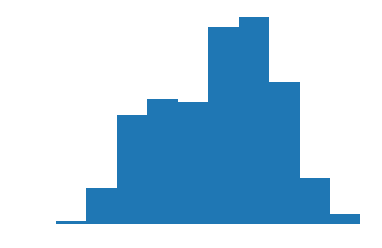

In [48]:
#Distribution of the age column with a histogram 
df.age.plot.hist()

**Chest pain vs Heart disease**

cp- chest pain type
 * 0: Typical Angina : Happens due to decreased blood supply to the heart 
 * 1: Atypical Angina : Chest pain not realted to heart
 * 2: Non-Anginal pain : Esophageal Spasms , Not releated to heart
 * 3: Asymptomatic : Chest pain not showing signs of disease  
 
9. exang - exercise induced angina (1= yes , 0 = no) 

In [49]:
pd.crosstab(df["target"],df["cp"])  #can also do (df.target,df.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


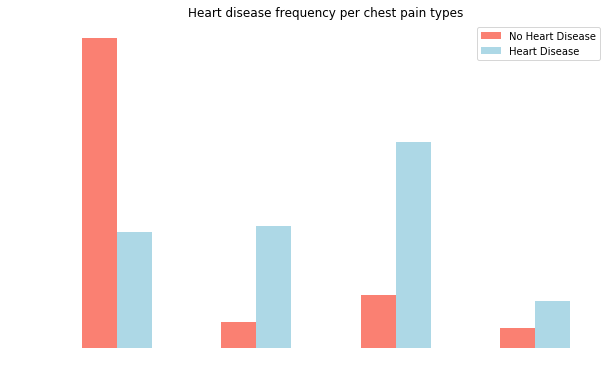

In [50]:
pd.crosstab(df["cp"],df["target"],).plot(kind="bar",
                                        figsize=(10,6),
                                        color=["salmon","lightblue"])
plt.title("Heart disease frequency per chest pain types")
plt.xlabel("Chest pain type")
plt.ylabel("Number")
plt.legend(["No Heart Disease","Heart Disease"])

**Building corelation matrics**

In [51]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.0, 0.0)

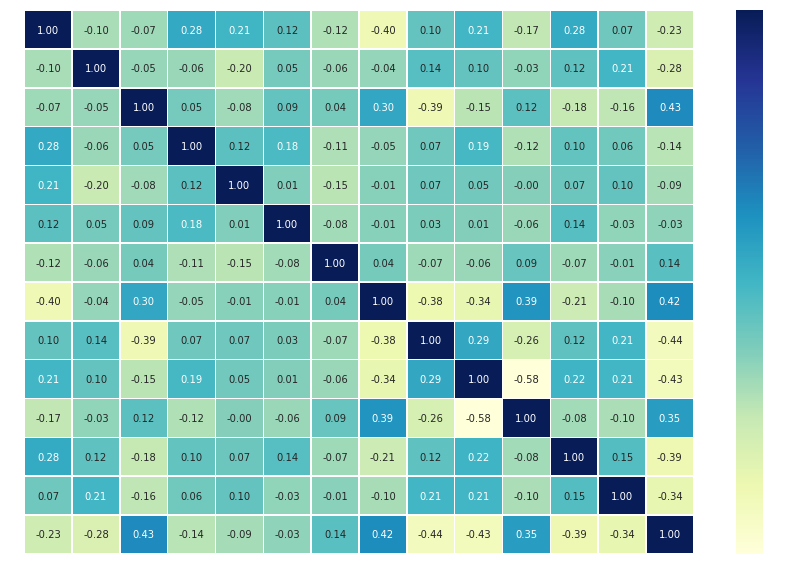

In [52]:
corr_matrix = df.corr()
fig = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True, #annotation
                linewidths = 0.5,
                fmt =".2f",
                cmap="YlGnBu" 
                );

#adjusting the top and bottom cut off
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top - 0.5)

Example of neg corelstion = exang has negative corelation , meaning if exercise related heart pain is less , less the value of target , means less probability of heart disease

In [53]:
X = df.drop("target",axis=1)
Y = df["target"]

In [54]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size= 0.2)

**Going to try out these models**

1- Logistic Regression  // it's actually a linear model for classification     
2- K-nearest neighbours classifier          
3- Random forest classifier 

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [55]:
# Put models in dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN" : KNeighborsClassifier(),
          "Random Forest" : RandomForestClassifier()
         }

# Create a fucntion to fit and score models 
def fit_and_score(models,X_train,X_test,Y_train,Y_test):
    """
    Fits and evaluates ML Models ,
    models : a dict of different sklearn ml models 
    """
    np.random.seed(42)
    #dict for keeping model score 
    model_scores= {}
    #loop through the models
    for name,model in models.items() :# name= key, model= definition of the dict
        #fit data into models 
        model.fit (X_train,Y_train)
        #save the score in the dictionary 
        model_scores[name]= model.score(X_test,Y_test)
    return model_scores    
    

In [56]:
model_scores = fit_and_score(models = models,
                            X_train = X_train,
                            X_test = X_test,
                            Y_train = Y_train,
                            Y_test = Y_test)
model_scores

c:\users\arian\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\arian\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'Logistic Regression': 0.8360655737704918,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8524590163934426}

This is the base model , without tuniung up 

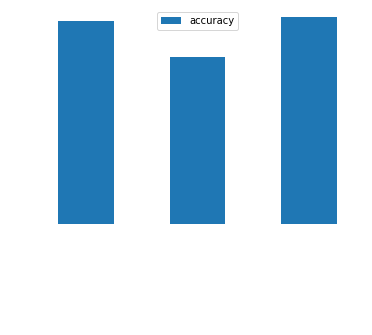

In [57]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar()

To do for Classification -
* Hyperparameter tuning
* Feature importance 
* Confusion Matrix
* Cross-Validation
* Precission
* Recall
* F1 Score
* Classification Report 
* ROC Curve
* Area under the curve (AUC)


**Hyperparameter Tuning**

In [58]:
# Tuning  KNN n-neighbour 

train_scores =[]
test_score = []

n = range(1,21)

knn= KNeighborsClassifier()

for i in n:
    knn.set_params(n_neighbors= i)
    knn.fit(X_train,Y_train)
    train_scores.append(knn.score(X_train,Y_train))
    test_score.append(knn.score(X_test,Y_test))
    
test_score

[0.5901639344262295,
 0.6065573770491803,
 0.6885245901639344,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.6721311475409836,
 0.6721311475409836,
 0.639344262295082,
 0.6721311475409836,
 0.6721311475409836,
 0.639344262295082,
 0.639344262295082,
 0.6229508196721312,
 0.6065573770491803,
 0.639344262295082,
 0.6065573770491803,
 0.639344262295082,
 0.639344262295082,
 0.6721311475409836]

Max Knn Train score 70.49% 


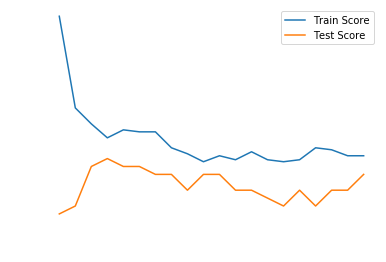

In [59]:
plt.plot(n,train_scores, label = "Train Score")
plt.plot(n,test_score, label = "Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbours")
plt.ylabel("Model Score")
plt.legend()

print(f"Max Knn Train score {max(test_score)*100:.2f}% ")

## Hyperparameter tuning using RandomSearchCV

We're going to tune 
* LogisticRegression()
* RandomForestClassifier()

In [60]:
#Hyperparameter grid for LogisticRegression
log_reg_grid = {'C': np.logspace(-4,4,20), #most important
               'solver':['liblinear']}
#Hyperparameter grid for RandomForestClassifier 
rf_grid= {"n_estimators":np.arange(10,1000,50),
         "max_depth": [None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)}

In [61]:
np.random.seed(42)

# Setup random  hypterparameter search for LogisticRegressioncliff 

clf = LogisticRegression()
rs_log_reg = RandomizedSearchCV(estimator = clf,
                               param_distributions = log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose= True)
# Fit random hyperparameter search model for LogisticRegression


In [62]:
rs_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
c:\users\arian\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=20, n_jobs=None,
                   param_distributi...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [63]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [64]:
print(f" After tuning Logistic Regression Score {rs_log_reg.score(X_test,Y_test):.5f}")

 After tuning Logistic Regression Score 0.88525


In [65]:
## Tuning Random Forest Classifier 
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)
rs_rf.fit(X_train,Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished
c:\users\arian\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [66]:
rs_rf.best_params_

{'n_estimators': 560,
 'min_samples_split': 12,
 'min_samples_leaf': 9,
 'max_depth': 10}

In [67]:
rs_rf.score(X_test,Y_test)

0.8688524590163934

In [68]:
print(f" RNN After tuning {rs_rf.score(X_test,Y_test):.5f} \n Before tuning Random Forest': 0.75409")

 RNN After tuning 0.86885 
 Before tuning Random Forest': 0.75409


## Tuning Hyperparameter using GridSearchCV

since our logistic regression had the best score so far, we'll try improving this model via gridsearch 

In [69]:
log_reg_grid = {"C": np.logspace(-4,4,30),
               "solver": ['liblinear']}
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid= log_reg_grid,
                         cv=5,
                         verbose=True)
gs_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.8s finished
c:\users\arian\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.0000000...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.

In [70]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [71]:
rs_log_reg.score(X_test,Y_test)  ,gs_log_reg.score(X_test,Y_test)

(0.8852459016393442, 0.8852459016393442)

somehow Random Search is performing better than GridSearch

# Evaluation of the model that's working the best

* ROC curve and AUC score
* Confusion matrix
* Classification report 
* Precision 
* Recall
* F1


Use crossvalidation where possible

In [72]:
Y_preds = rs_log_reg.predict(X_test)


In [73]:
# Doesn't work
#roc_curve(rs_log_reg,Y_test,Y_preds)


In [74]:
print(confusion_matrix(Y_test,Y_preds))

[[22  4]
 [ 3 32]]


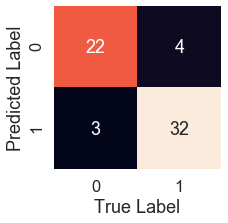

In [75]:
sns.set(font_scale=1.5)

def plot_conf_matrix (Y_test, Y_preds):
    fig = plt.subplots(figsize= (3,3))
    ax = sns.heatmap(confusion_matrix(Y_test,Y_preds),
                    annot= True,
                    cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
    bottom,top = ax.get_ylim()
    ax.set_ylim(bottom+ .5 , top-.5)
plot_conf_matrix(Y_test,Y_preds)    
    
    

 Now we have a ROC curve , AUC metric and a confusion matrix, let's get a classification report , cross-validated precision , recall and f1 score 

In [76]:
print(classification_report(Y_test,Y_preds)) 


              precision    recall  f1-score   support

           0       0.88      0.85      0.86        26
           1       0.89      0.91      0.90        35

    accuracy                           0.89        61
   macro avg       0.88      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



This report is only for one set of split , need to make one for cross validated report 

### Calculate cross validation metrics using cross-validation

We're going to calculate precision , recall and f1-score of our models using cross-validation using  'cross_val_score()'

In [77]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [78]:
clf = LogisticRegression(C=0.1082636733874054,
                        solver='liblinear')

In [79]:
#Cross val accuracy 
cv_acc = cross_val_score(clf,
                        X,
                        Y,
                        cv=5,
                        scoring="accuracy")
cv_acc = cv_acc.mean()
cv_acc

0.834808743169399

In [80]:
# Cv precision 
cv_precision = cross_val_score(clf,
                        X,
                        Y,
                        cv=5,
                        scoring="precision")
cv_precision = cv_precision.mean()
cv_precision

0.8182683982683983

In [81]:
#Cross val Recall 
cv_recall = cross_val_score(clf,
                        X,
                        Y,
                        cv=5,
                        scoring="recall")
cv_recall = cv_recall.mean()
cv_recall

0.9030303030303031

In [82]:
#Cross val  F1
cv_f1 = cross_val_score(clf,
                        X,
                        Y,
                        cv=5,
                        scoring="f1")
cv_f1 = cv_f1.mean()
cv_f1

0.8572876223964057

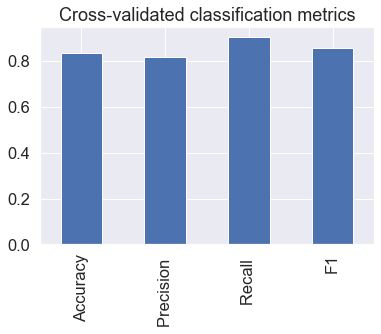

In [83]:
cv_metrics = pd.DataFrame({"Accuracy" :cv_acc,
                         "Precision ":cv_precision,
                         "Recall ":cv_recall,
                         "F1":cv_f1},
                         index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",legend=False)

### Feature importance 

Which features contributed the most to the model in prediction 

Search ' [model name] feature importance  '

In [84]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [85]:
# Fit the instance of Logistic Regression

clf = LogisticRegression(C=0.1082636733874054,
                        solver='liblinear')
clf.fit(X_train,Y_train)

LogisticRegression(C=0.1082636733874054, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
# Check coef_
clf.coef_

array([[ 0.0086955 , -0.61360658,  0.66908829, -0.02072017, -0.00152991,
        -0.01906412,  0.32572769,  0.025037  , -0.45424449, -0.44973605,
         0.36369496, -0.56717873, -0.42720339]])

In [87]:
#Match coef's of features to column names
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.008695503363779328,
 'sex': -0.6136065834652962,
 'cp': 0.6690882855700857,
 'trestbps': -0.020720168845829993,
 'chol': -0.001529913201738391,
 'fbs': -0.019064121587561676,
 'restecg': 0.3257276880558277,
 'thalach': 0.0250369984210346,
 'exang': -0.45424449355239566,
 'oldpeak': -0.4497360485344746,
 'slope': 0.3636949569454827,
 'ca': -0.5671787278377163,
 'thal': -0.42720339217799297}

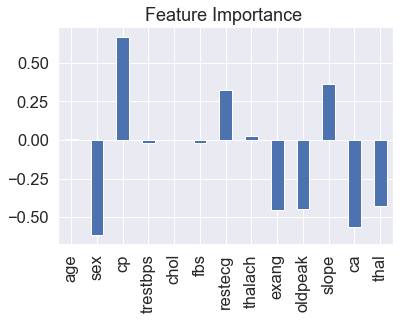

In [88]:
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance ", legend = False)